In [390]:
# import necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import boxcox


%matplotlib inline

In [391]:
train = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')
submission = pd.read_csv('../data/house-prices-advanced-regression-techniques/sample_submission.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [392]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [393]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [394]:
print(f'The shape of the train {train.shape}')
print(f'The shape of the test {test.shape}')
print(f'The shape of the submission{submission.shape}')
print(f'Columns in train but not in test: {set(train.columns) - set(test.columns)}')
print(f'Columns in test but not in train: {set(test.columns) - set(train.columns)}')

The shape of the train (1460, 81)
The shape of the test (1459, 80)
The shape of the submission(1459, 2)
Columns in train but not in test: {'SalePrice'}
Columns in test but not in train: set()


In [395]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [396]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [397]:
def nulls_per(df):
    # Assuming 'train' is your DataFrame
    missing_values = df.isnull().sum()
    total_rows = df.shape[0]

    # Create a DataFrame to display the missing values information
    missing_info = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Values': missing_values.values,
        'Percentage': (missing_values / total_rows) * 100
    })

    # Filter the DataFrame to show only columns with missing values
    columns_with_missing_values = missing_info[missing_info['Missing Values'] > 0]

    # Display the filtered information
    print("\nColumns with Missing Values")
    return columns_with_missing_values.sort_values(by='Missing Values', ascending=False)

In [398]:
nulls_per(train)


Columns with Missing Values


,Column,Missing Values,Percentage
PoolQC,PoolQC,1453,99.520548
MiscFeature,MiscFeature,1406,96.301370
Alley,Alley,1369,93.767123
Fence,Fence,1179,80.753425
MasVnrType,MasVnrType,872,59.726027
FireplaceQu,FireplaceQu,690,47.260274
LotFrontage,LotFrontage,259,17.739726
GarageType,GarageType,81,5.547945
GarageYrBlt,GarageYrBlt,81,5.547945
GarageFinish,GarageFinish,81,5.547945


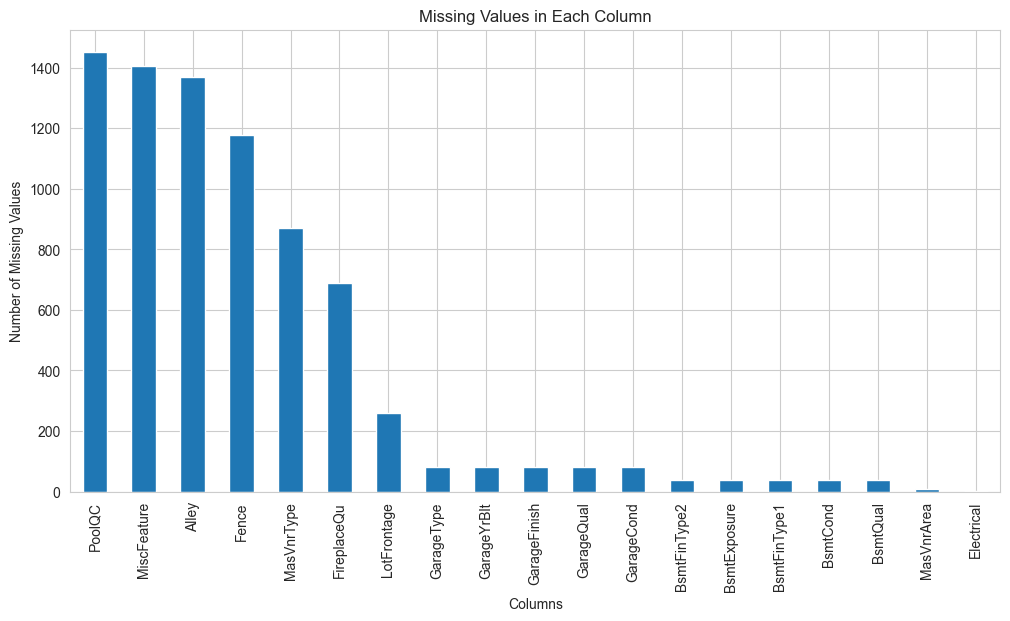

In [399]:
# Identifying columns with missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plotting missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


The bar plot illustrates the number of missing values in each column of the train dataset. As shown, columns like PoolQC, MiscFeature, Alley, and Fence have the highest number of missing values, which aligns with the earlier analysis. This visual representation helps in understanding the extent of missing data

In [400]:
# Handling missing values

# A threshold for dropping columns (e.g., if more than 40% data is missing)
threshold = 0.60 * len(train)

# Dropping columns with missing values exceeding the threshold
cleand_train = train.dropna(thresh=threshold, axis=1)
nulls_per(cleand_train)


Columns with Missing Values


,Column,Missing Values,Percentage
LotFrontage,LotFrontage,259,17.739726
GarageType,GarageType,81,5.547945
GarageYrBlt,GarageYrBlt,81,5.547945
GarageFinish,GarageFinish,81,5.547945
GarageQual,GarageQual,81,5.547945
GarageCond,GarageCond,81,5.547945
BsmtExposure,BsmtExposure,38,2.602740
BsmtFinType2,BsmtFinType2,38,2.602740
BsmtQual,BsmtQual,37,2.534247
BsmtCond,BsmtCond,37,2.534247


After applying the threshold for missing values (60% of the total number of rows), several columns with a high percentage of missing values have been dropped from the train dataset. The cleaned dataset, cleaned_train, now has fewer columns with missing values. Here's a summary:

1. Reduced Missing Values: The columns with the highest missing values previously (PoolQC, MiscFeature, Alley, Fence) have been removed as they exceeded the 60% threshold.
2. Remaining Columns with Missing Values:

    - LotFrontage: 17.74% missing
    - Garage-related features (GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond): Each has 5.55% missing
    - Basement-related features (BsmtExposure, BsmtFinType2, BsmtQual, BsmtCond, BsmtFinType1): Ranging from 2.53% to 2.60% missing
    - MasVnrType and MasVnrArea: Around 0.55% missing
    - Electrical: Only 0.07% missing

In [401]:
cleand_train[cleand_train.columns[cleand_train.isnull().any()]]

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,85.0,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,66.0,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,68.0,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


In [402]:
cleand_train[cleand_train.columns[cleand_train.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [403]:
# For date features
cleand_train = cleand_train.dropna(subset=['GarageYrBlt'])

# For numerical features, we use median (to avoid influence of outliers)
# For categorical features, we use mode (most frequent value)
for column in cleand_train.columns:
    if cleand_train[column].dtype == 'object':
        cleand_train[column].fillna(cleand_train[column].mode()[0], inplace=True)
    else:
        cleand_train[column].fillna(cleand_train[column].median(), inplace=True)

# Checking if there are any missing values left
remaining_missing_values = cleand_train.isnull().sum().sum()
remaining_missing_values

0

1. Rows where GarageYrBlt was missing have been dropped.
2. For numerical features, missing values were filled with the median of the respective columns.
3. For categorical features, missing values were filled with the mode (most frequent value) of the respective columns.

In [404]:
# Check for duplicates and keep the first instance
cleand_train[cleand_train.duplicated(keep="first")].index

Index([], dtype='int64')

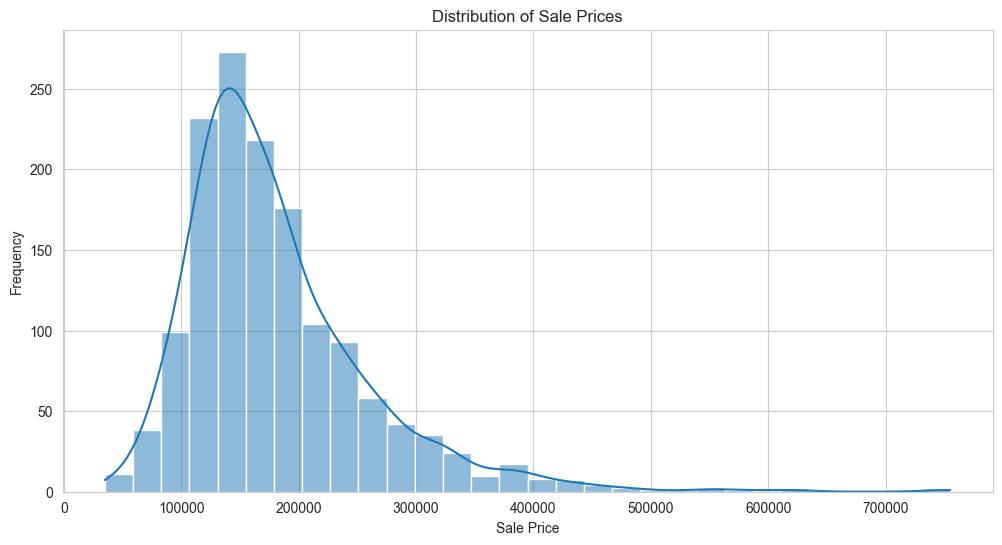

In [405]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of the SalePrice (Target Variable)
plt.figure(figsize=(12, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()



1. Skewed Distribution: The distribution of SalePrice is right-skewed, indicating that most of the houses are in the lower price range, while fewer houses are in the higher price range.
2. Central Tendency: The peak of the distribution (mode) lies in the lower price range, suggesting that the most common sale prices are relatively low.
3. Outliers: There appears to be a long tail towards the higher end of the sale prices, indicating the presence of outliers in the higher price range.

/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/738548357.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cleand_train.hist(bins=50, ax=ax);


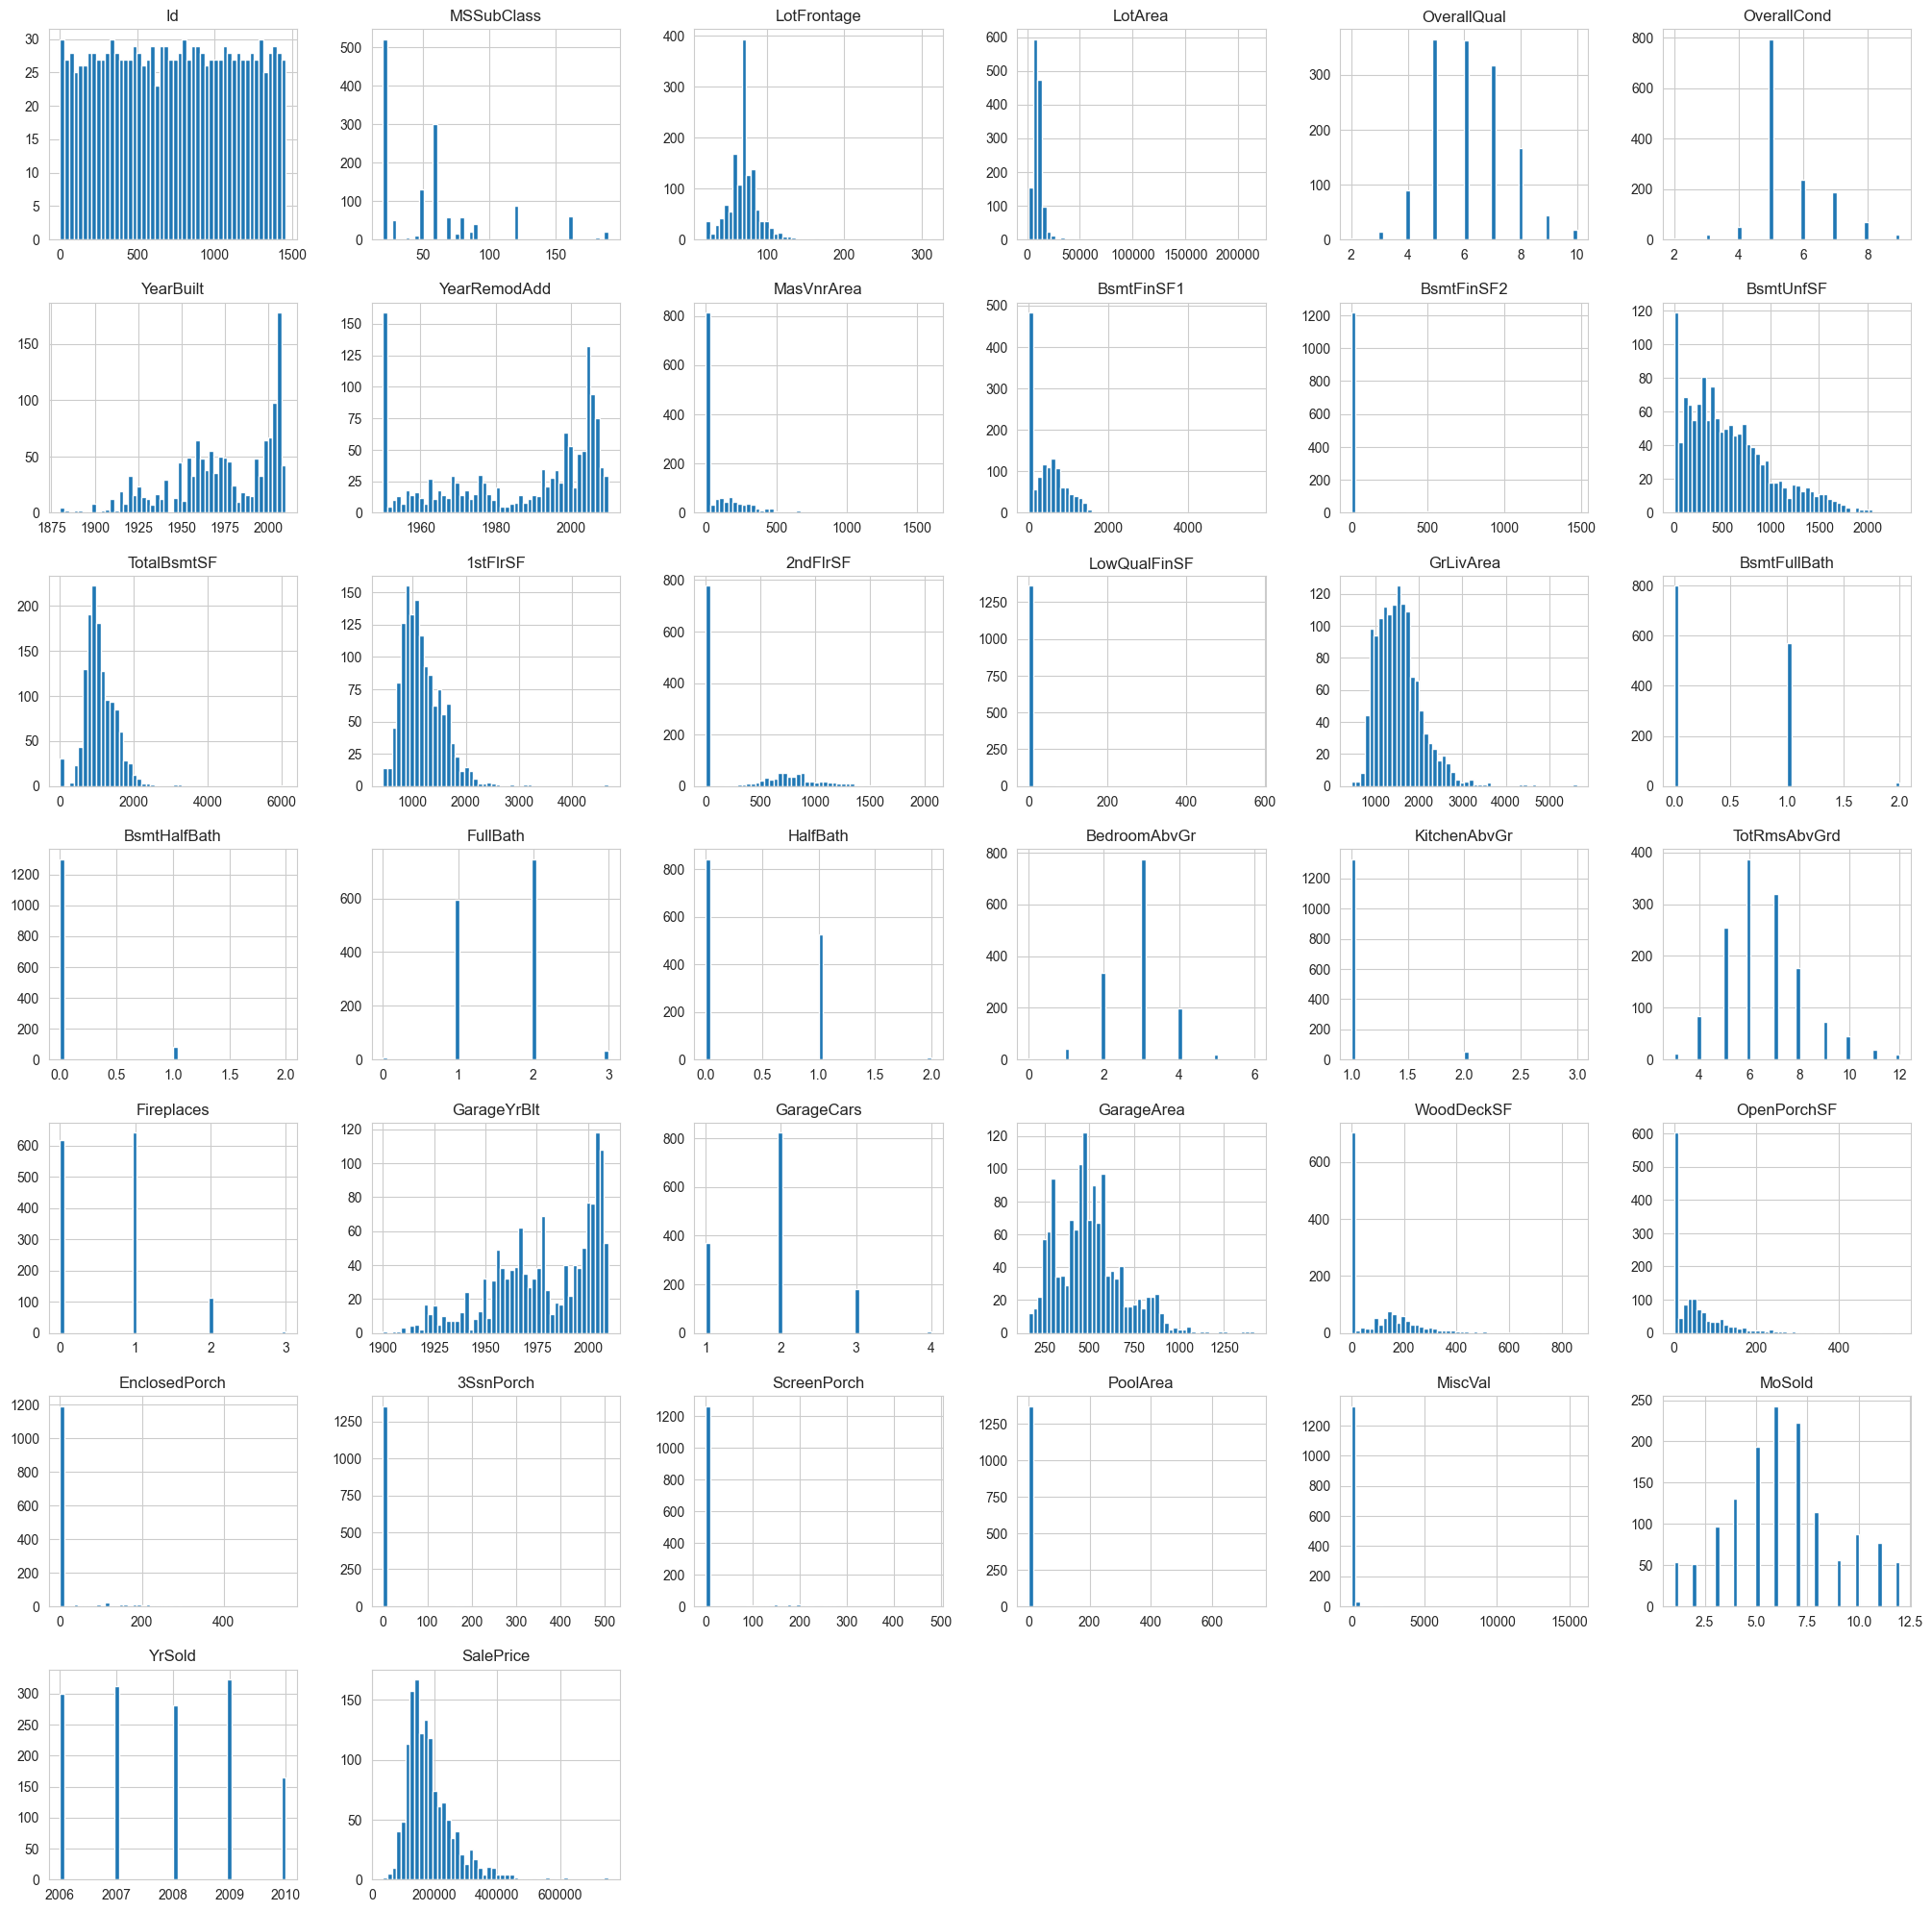

In [406]:
# Look at the distribution of the data
fig, ax = plt.subplots(figsize=(25,25))
cleand_train.hist(bins=50, ax=ax);

1. Skewness: Some features may exhibit right or left skewness, similar to what we observed in the SalePrice distribution.
2. Scale: The scales of different features vary, which can be important for certain machine learning models that are sensitive to the scale of the data.
3. Outliers: Some histograms may indicate the presence of outliers by showing a long tail.
4. Distribution Patterns: Some features might show a multi-modal distribution, whereas others could be more uniformly or normally distributed.

In [407]:
cleand_train.shape

(1379, 75)

In [408]:
# Look at the skewness of the data
without_object = cleand_train.select_dtypes(include=['int64','float64'])
skew = without_object.skew()
pd.DataFrame(data=skew, columns=["Skew"])

,Skew
Id,-0.005092
MSSubClass,1.379754
LotFrontage,2.493185
LotArea,12.013038
OverallQual,0.288081
OverallCond,0.866698
YearBuilt,-0.659563
YearRemodAdd,-0.544065
MasVnrArea,2.601035
BsmtFinSF1,1.678351


1. Positive Skew: Many features show positive skewness (skew > 0), meaning the tail is on the right side of the distribution. This includes features like LotArea, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea, and SalePrice.
2. Highly Skewed Features: Some features exhibit very high skewness, such as LotArea, BsmtFinSF2, LowQualFinSF, KitchenAbvGr, 3SsnPorch, ScreenPorch, PoolArea, and MiscVal. These might represent features with a lot of zeros or a few large  values.
3. Negative Skew: A few features show negative skewness (skew < 0), such as YearBuilt and GarageYrBlt, indicating the tail is on the left side of the distribution.
4. Near Zero Skew: Features like Id, FullBath, BedroomAbvGr, MoSold, and YrSold have skewness near zero, indicating a more symmetric distribution.

<Axes: >

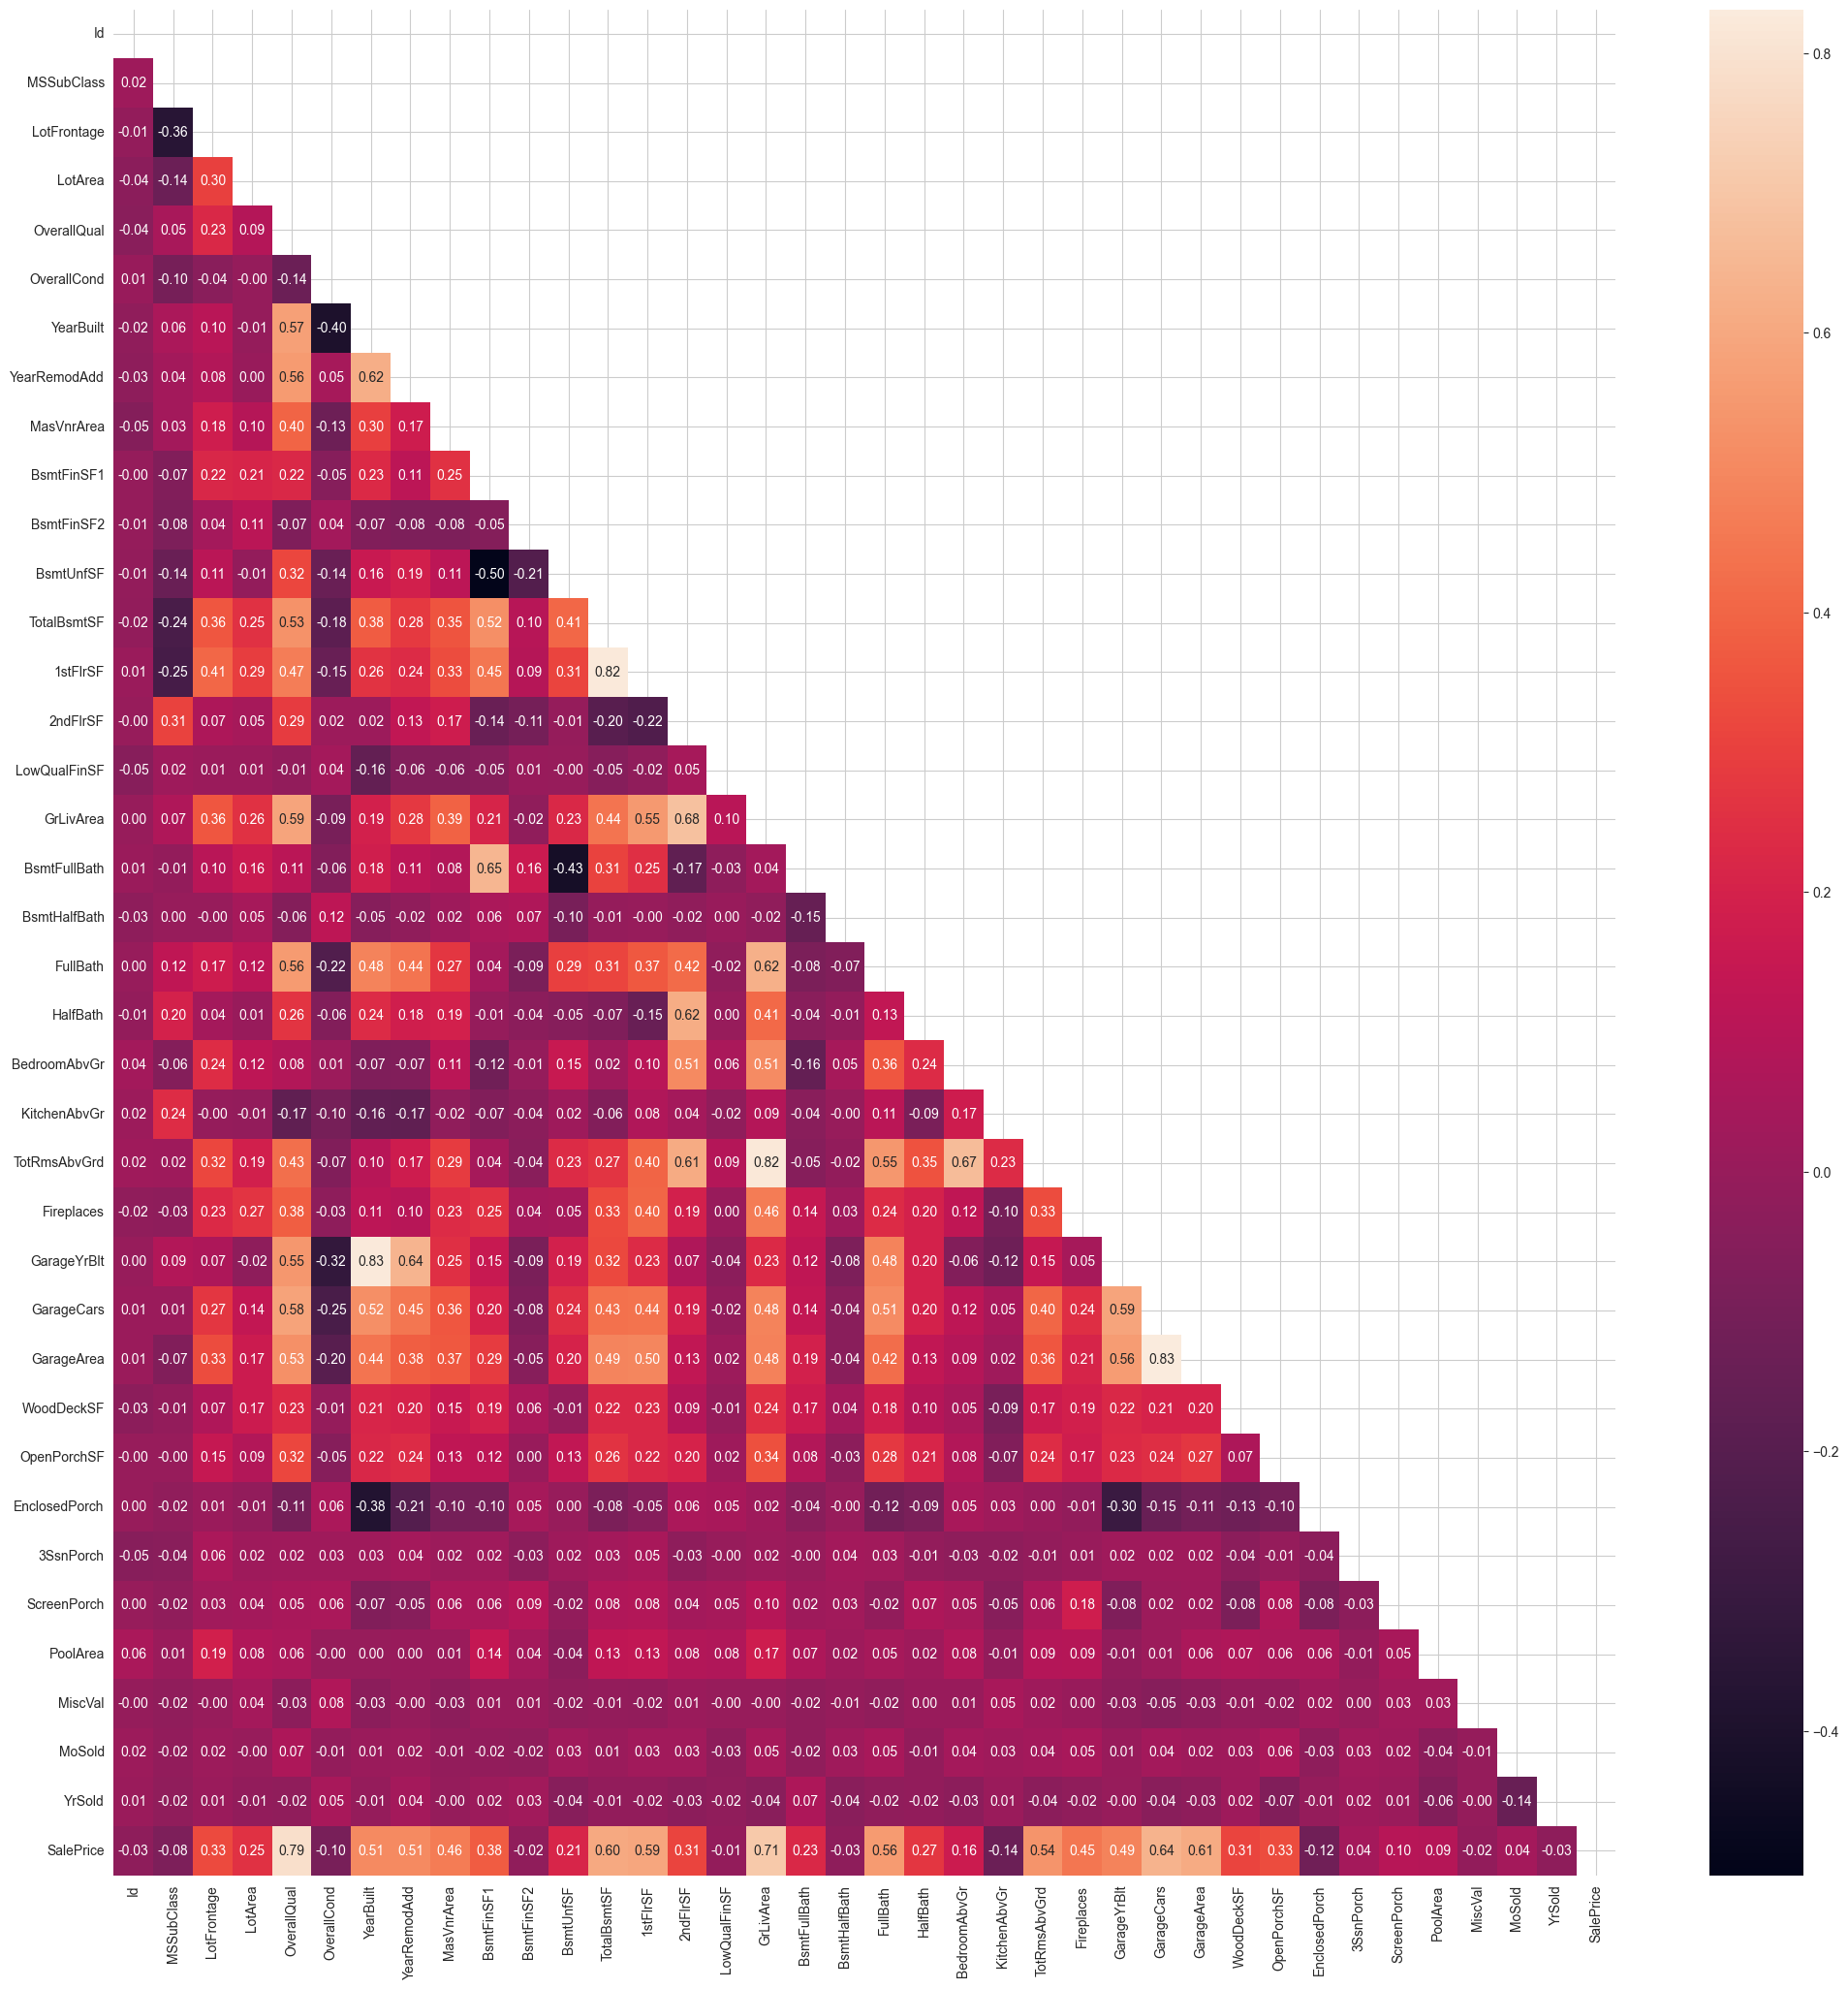

In [409]:
# Visualize the matrix on a heatmap
mask = np.triu(without_object.corr())
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data=without_object.corr(), annot=True, fmt=".2f", ax=ax, mask=mask)

<Axes: >

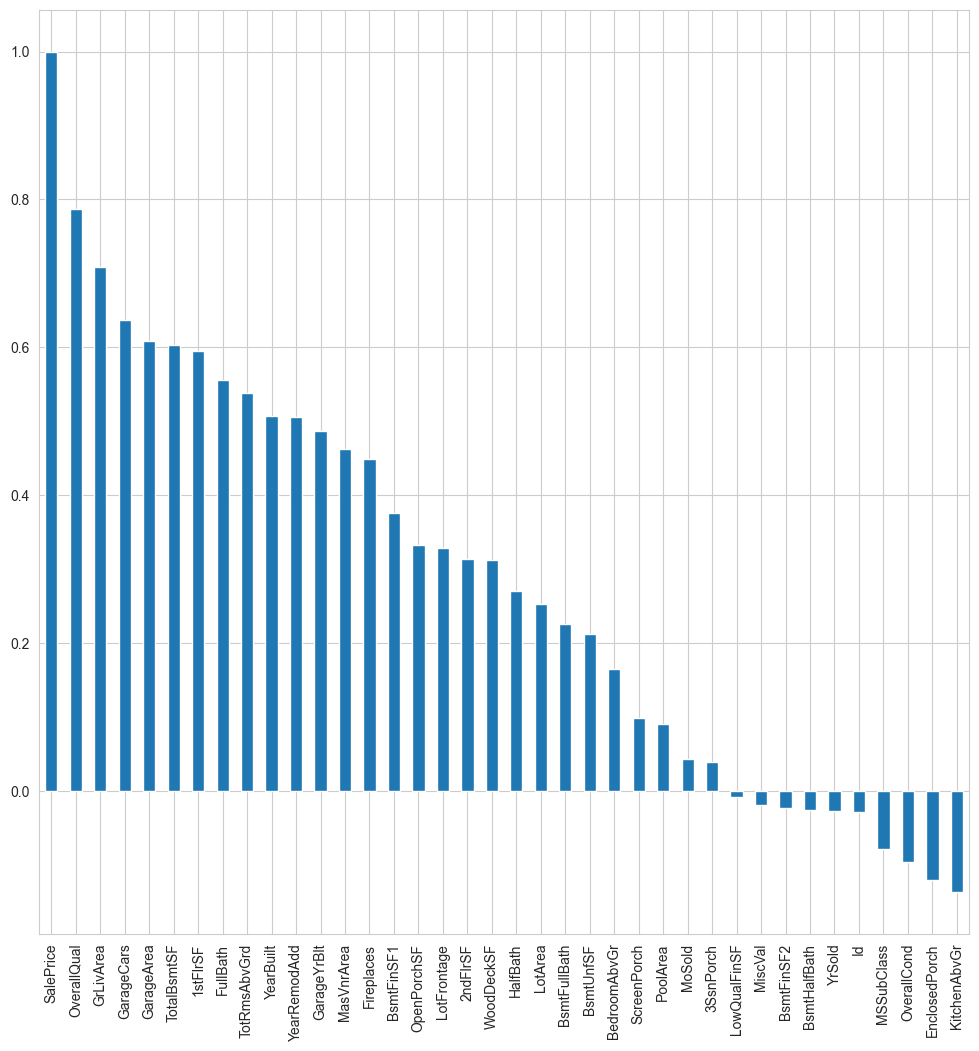

In [410]:
# Bar plot to visualize what physicochemical properties correlate more with the quality
fig, ax = plt.subplots(figsize=(12,12))
without_object.corr()["SalePrice"].sort_values(ascending=False).plot(kind="bar", ax=ax)

1. Positive Correlations: Features that have a positive correlation with SalePrice increase as the sale price increases. The taller the bar, the stronger this positive relationship is.
2. Negative Correlations: Features with negative correlations (bars extending downwards) have an inverse relationship with SalePrice. As these feature values increase, the sale price tends to decrease.
3. Strength of Correlation: The length of the bars indicates the strength of the correlation. Features with longer bars (in either direction) have a stronger linear relationship with the sale price.
4. Highly Correlated Features: Features like OverallQual, GrLivArea, GarageCars, and GarageArea appear to have a strong positive correlation with SalePrice.
5. Low or No Correlation: Features with bars very close to the horizontal axis have little to no linear correlation with the sale price.

In [411]:
# Calculate correlation with 'sales_price'
correlation = without_object.corrwith(without_object['SalePrice'])

# Filter columns where correlation is greater than 0.4
# (excluding 'sales_price' itself)
selected_columns = correlation[correlation > 0.4].index 

# Create a new DataFrame with the selected columns
corr_above_04 = without_object[selected_columns]
corr_above_04.reset_index(drop=True, inplace=True)
columns_to_exclude = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
corr_above_04.drop(columns= columns_to_exclude, inplace=True)


/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/1323014905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_above_04.drop(columns= columns_to_exclude, inplace=True)


In [412]:
corr_above_04.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1379.0,6.187092,1.345780,2.0,5.0,6.0,7.0,10.0
MasVnrArea,1379.0,108.364757,184.195220,0.0,0.0,0.0,170.5,1600.0
TotalBsmtSF,1379.0,1074.445975,436.371874,0.0,810.0,1008.0,1314.0,6110.0
1stFlrSF,1379.0,1177.129804,387.014961,438.0,894.0,1098.0,1414.0,4692.0
GrLivArea,1379.0,1534.689630,519.140514,438.0,1154.0,1479.0,1790.0,5642.0
FullBath,1379.0,1.580131,0.548051,0.0,1.0,2.0,2.0,3.0
TotRmsAbvGrd,1379.0,6.552574,1.589821,3.0,5.0,6.0,7.0,12.0
Fireplaces,1379.0,0.641769,0.645985,0.0,0.0,1.0,1.0,3.0
GarageCars,1379.0,1.870921,0.630055,1.0,1.0,2.0,2.0,4.0
GarageArea,1379.0,500.762146,185.680520,160.0,380.0,484.0,580.0,1418.0


/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/1704806455.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  corr_above_04.hist(bins=50, ax=ax);


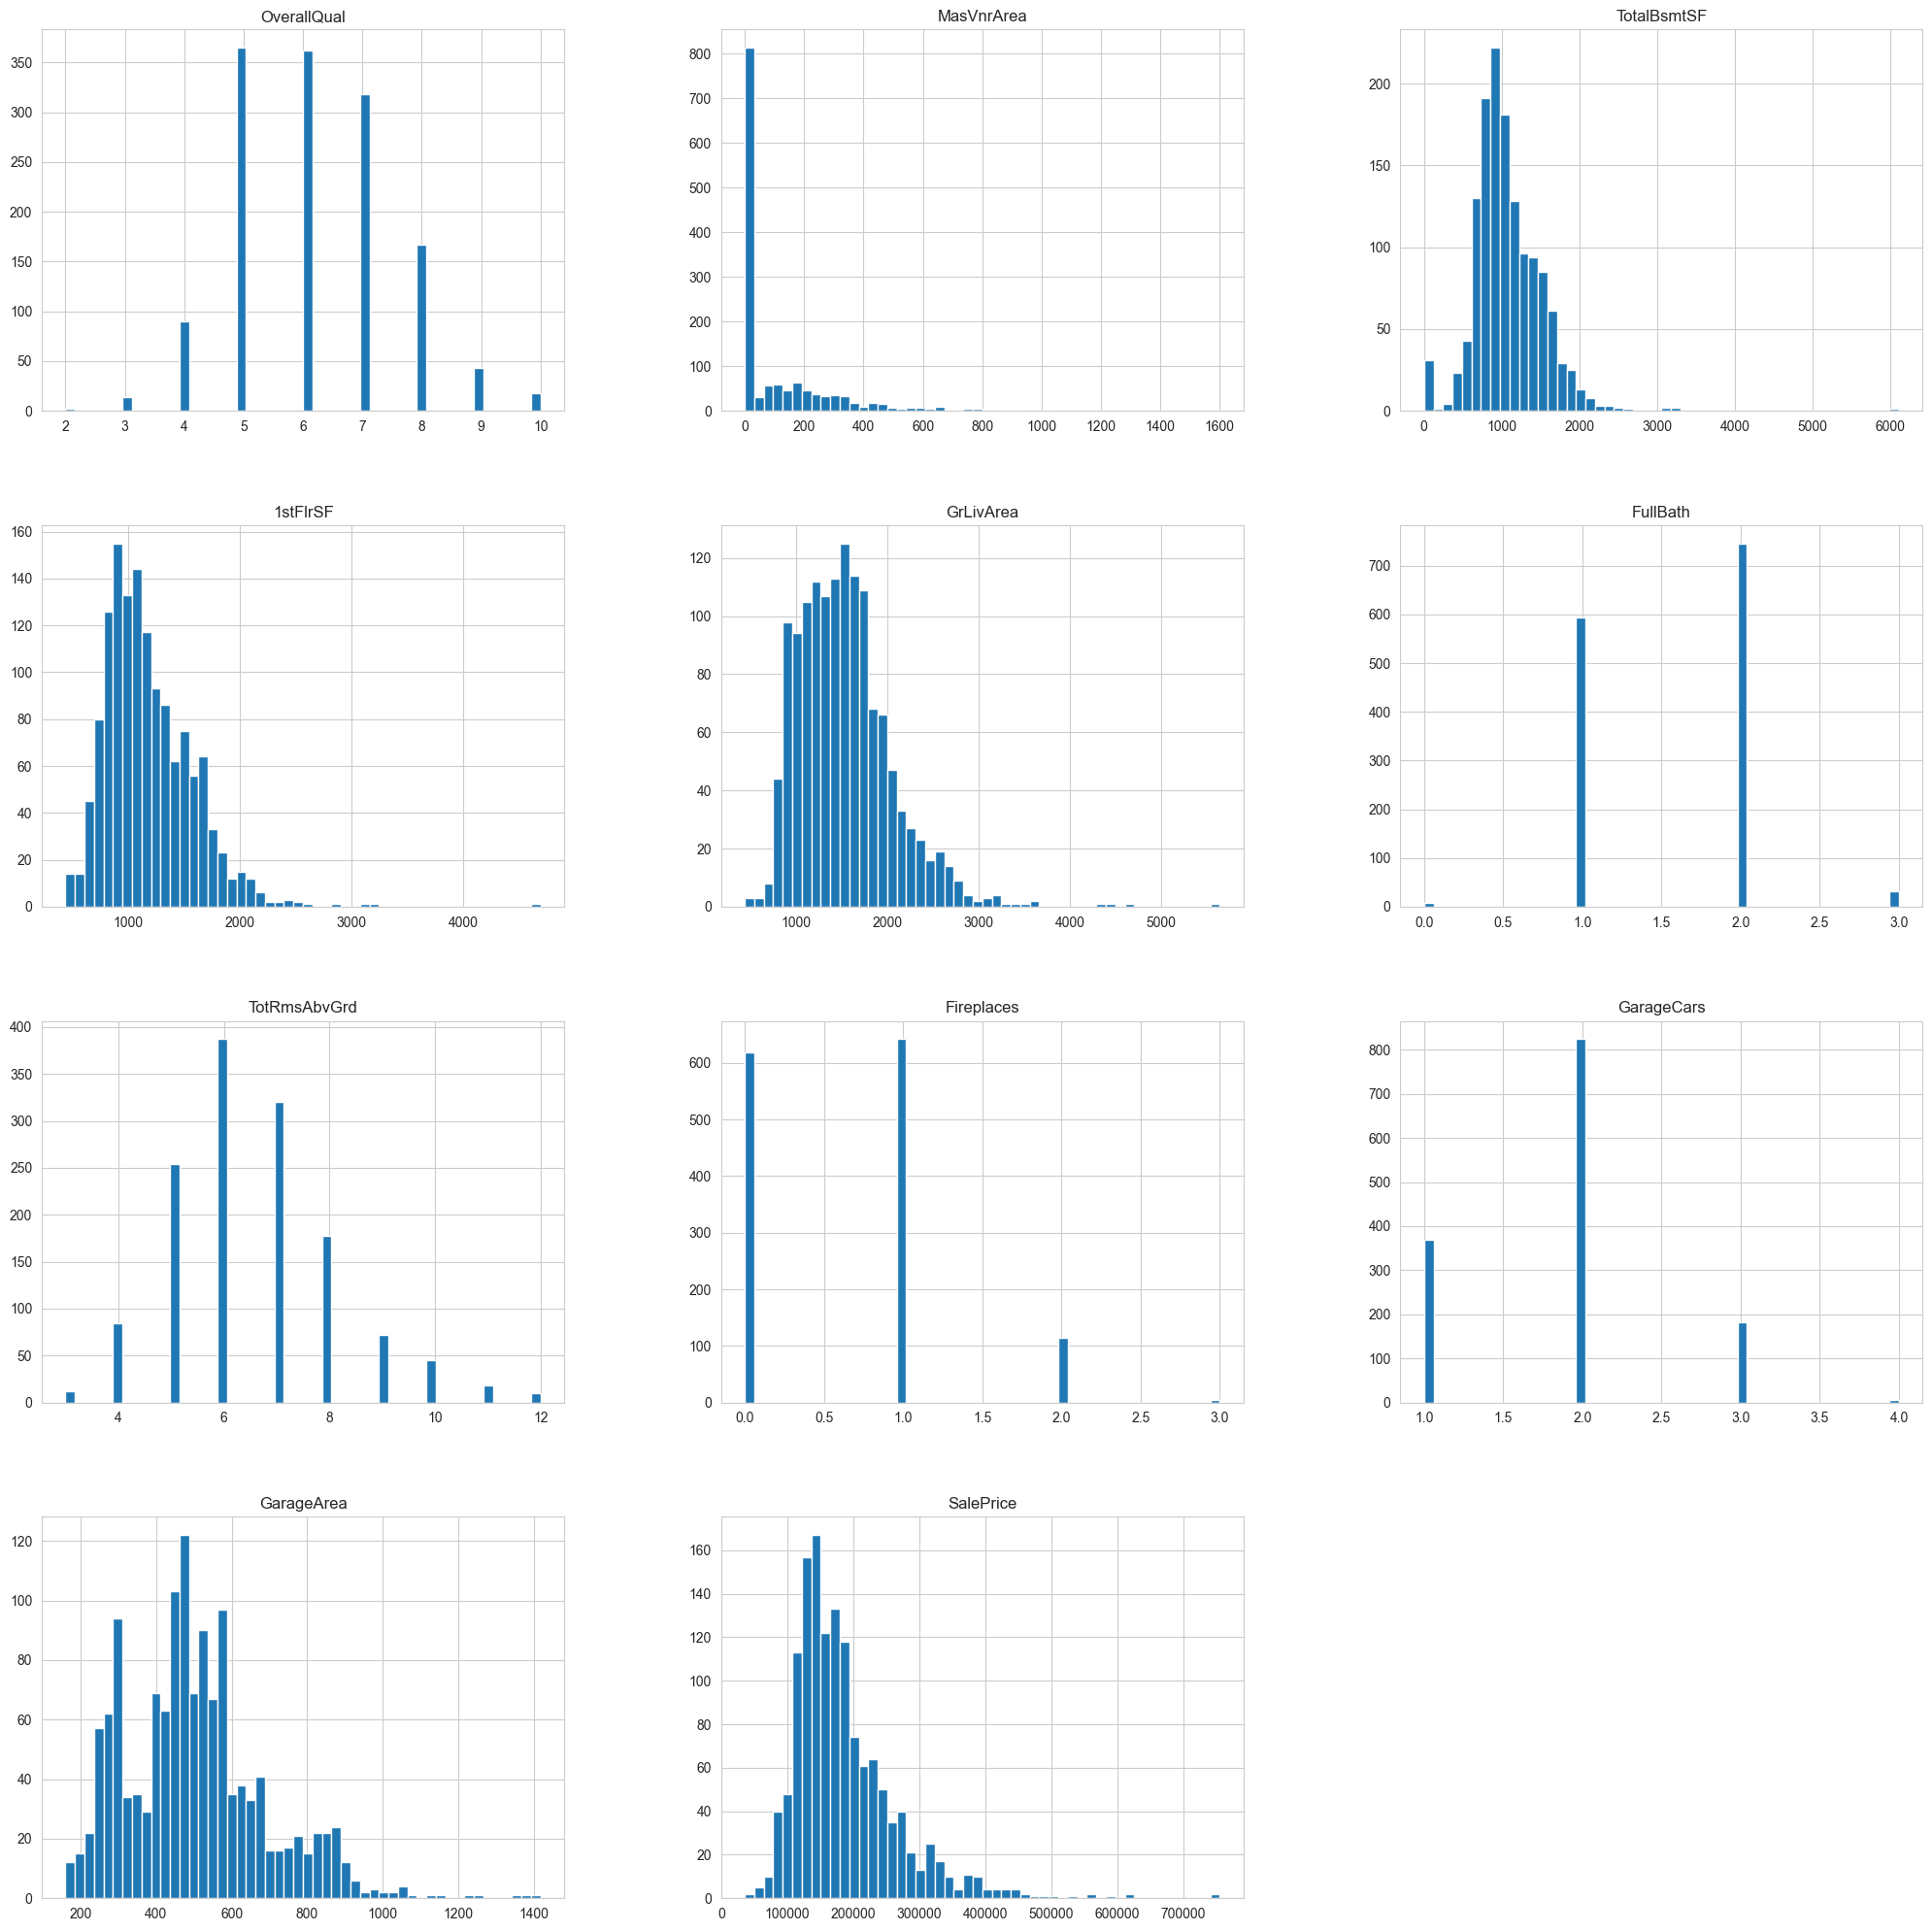

In [413]:
# Look at the distribution of the data
fig, ax = plt.subplots(figsize=(25,25))
corr_above_04.hist(bins=50, ax=ax);

/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/2667983072.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_above_04[col] = label_encoder.fit_transform(corr_above_04[col])
/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/2667983072.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_above_04[col] = label_encoder.fit_transform(corr_above_04[col])
/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/2667983072.py:7: SettingWithCopyWarning: 
A value is trying

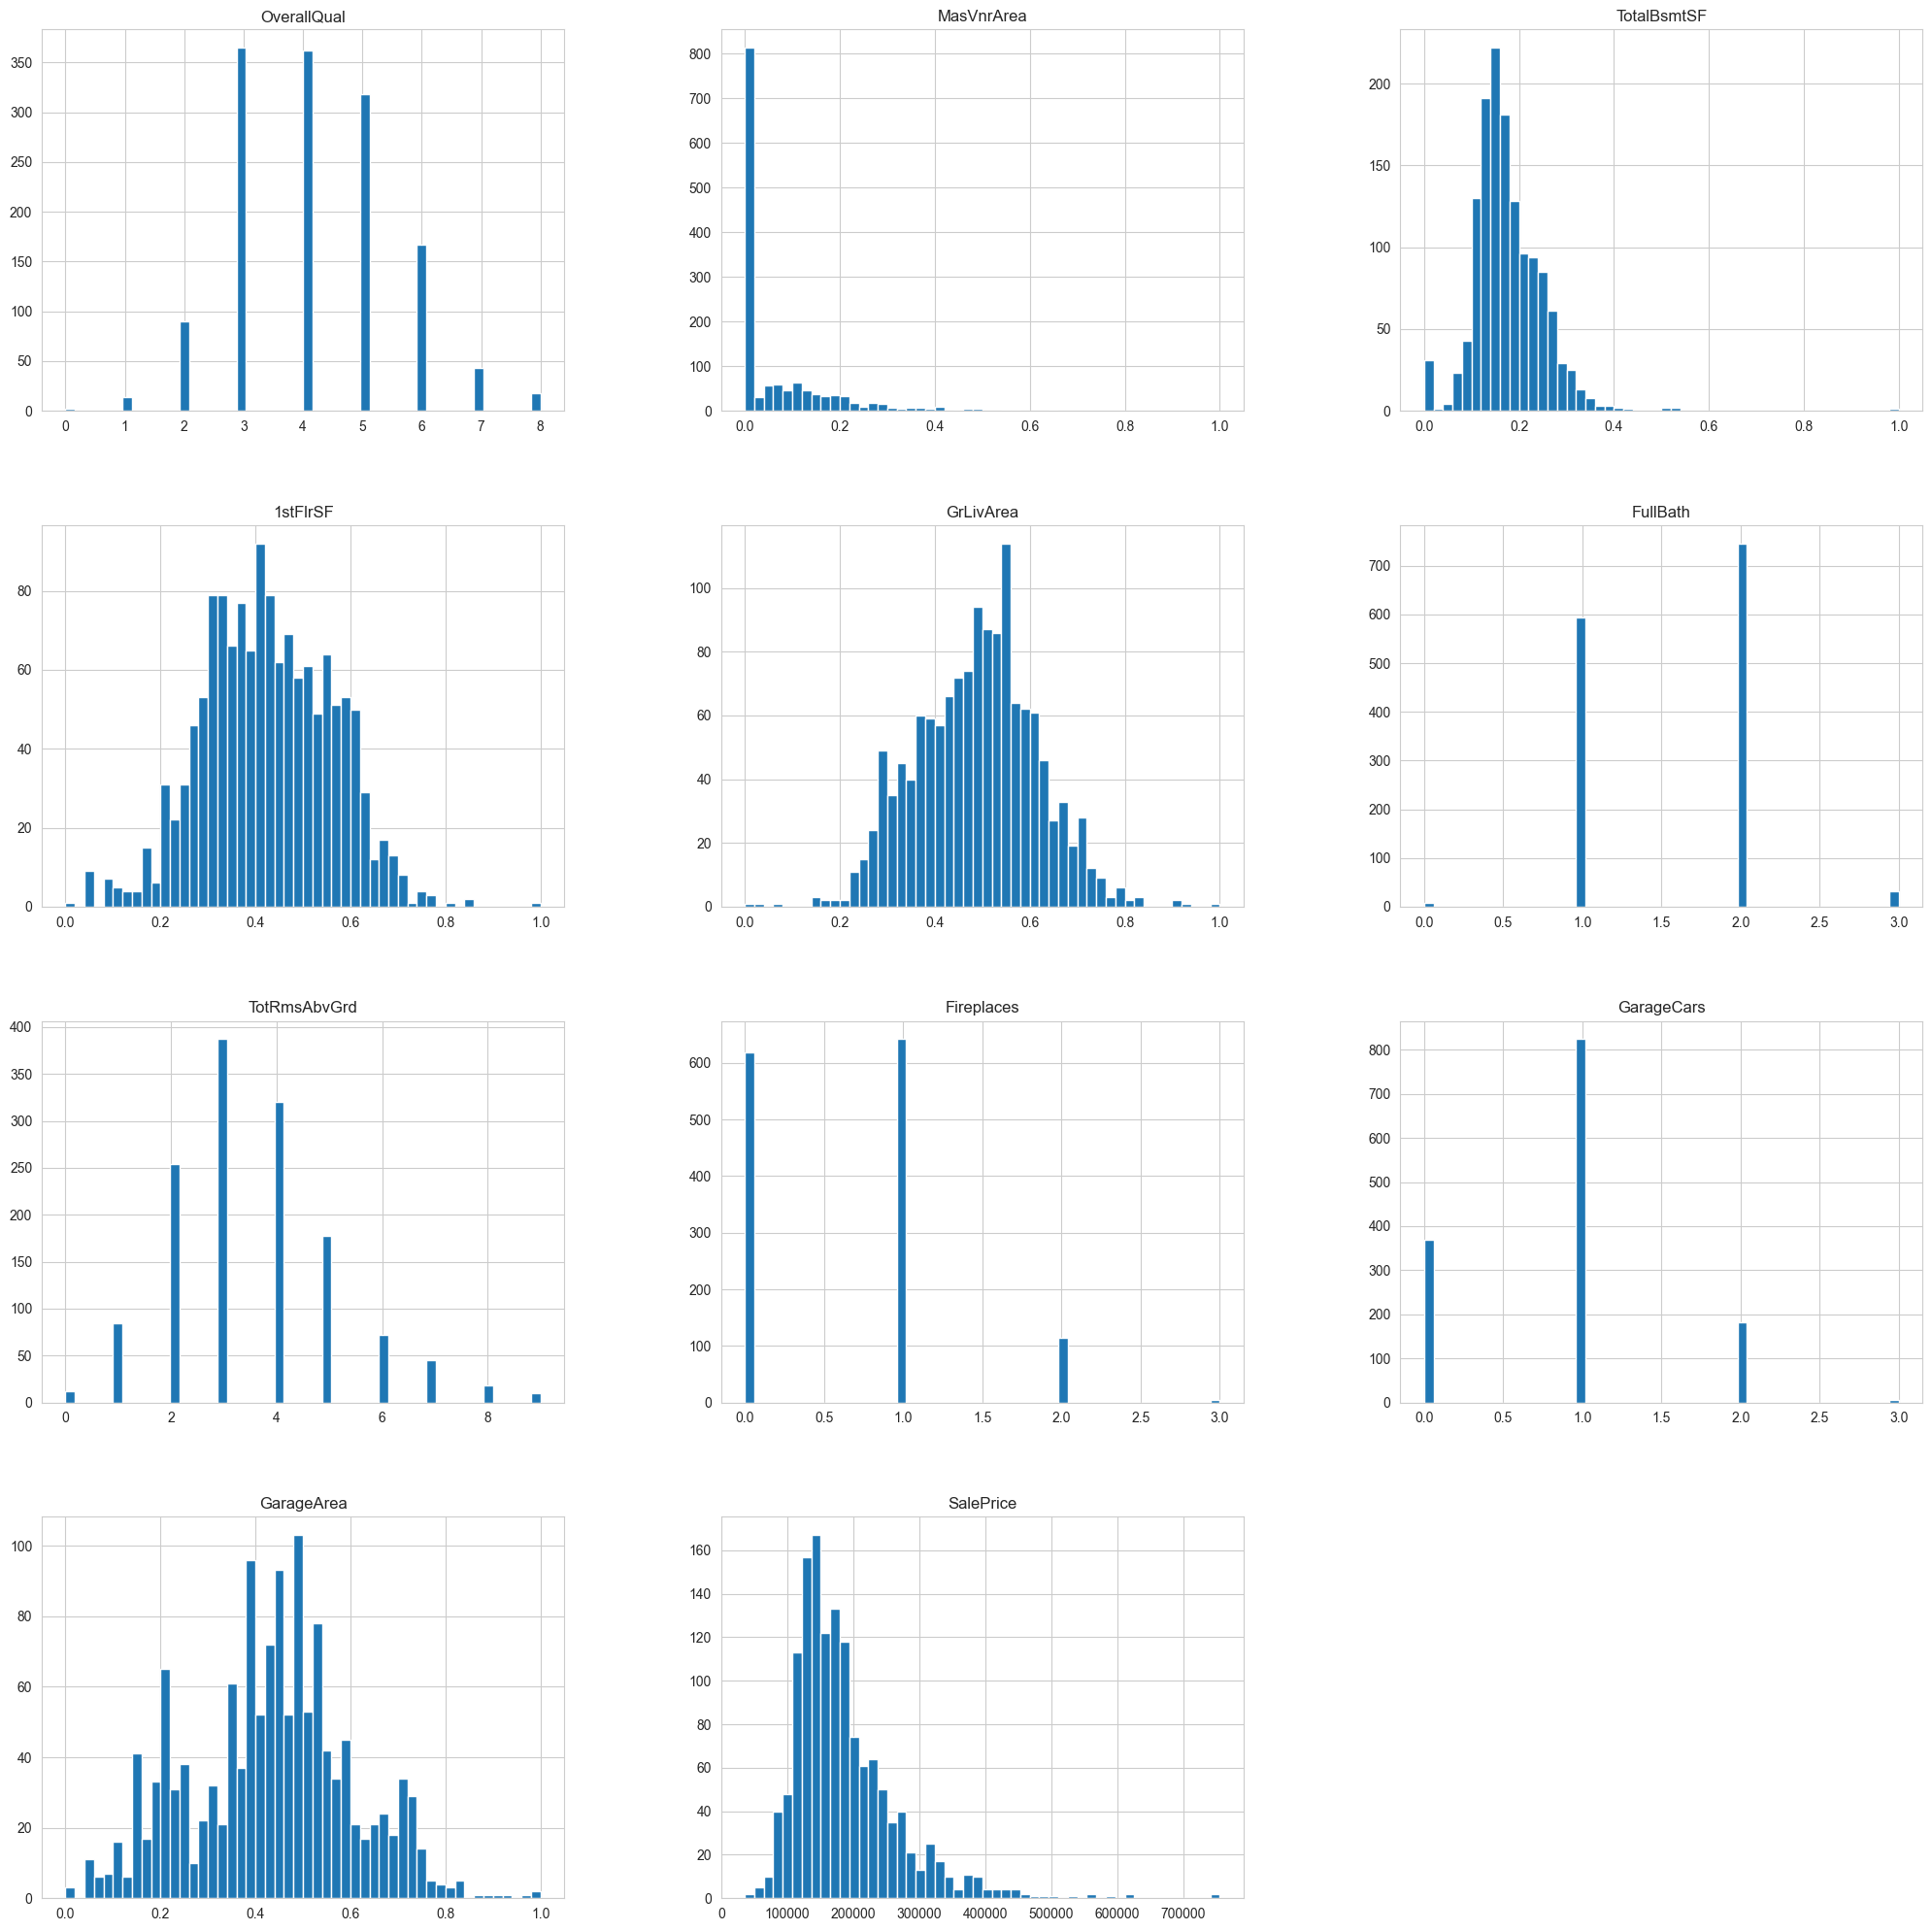

In [414]:
# Columns to encode
columns_to_encode = ['OverallQual', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

# Label Encoding
label_encoder = LabelEncoder()
for col in columns_to_encode:
    corr_above_04[col] = label_encoder.fit_transform(corr_above_04[col])

# Columns to transform and scale
columns_to_scale = ['MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']

# Transform and Scale
scaler = MinMaxScaler()

for col in columns_to_scale:
    # Check if Box-Cox can be applied (positive values only)
    if corr_above_04[col].min() > 0:
        corr_above_04[col], _ = boxcox(corr_above_04[col])
    else:
        # If Box-Cox can't be applied, you might choose another transformation
        # For now, we'll skip transformation in this case
        pass

    # Apply Min-Max scaling
    corr_above_04[col] = scaler.fit_transform(corr_above_04[[col]])


# Look at the distribution of the data
fig, ax = plt.subplots(figsize=(25,25))
corr_above_04.hist(bins=50, ax=ax);

In [415]:
# Separating the features and the target variable
X = corr_above_04.drop('SalePrice', axis=1)
y = corr_above_04['SalePrice']

In [416]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Checking the shape of the processed data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((827, 10), (552, 10), (827,), (552,))

In [417]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(22140.39663388544, 1405565993.321795, 37490.87880167381, 0.7786708838339634)

1. Mean Absolute Error (MAE): 22,063.16
    - This value represents the average absolute difference between the actual and predicted values. A lower MAE indicates better model performance.
2. Mean Squared Error (MSE): 1,719,063,391.24
    - MSE is the average of the squares of the errors. It's more sensitive to outliers than MAE.
3. Root Mean Squared Error (RMSE): 41,461.59
    - RMSE is the square root of MSE. It's in the same units as the target variable (SalePrice) and provides a measure of how large the residuals are spread out. Lower values of RMSE indicate better fit.
4. R-squared (R²): 0.7115
    - R² is a statistical measure of how close the data are to the fitted regression line. It ranges from 0 to 1, with higher values indicating a better fit. A value of 0.7115 suggests that about 71.15% of the variance in SalePrice is      explained by the model.

In [418]:
act_mean = corr_above_04['SalePrice'].mean()
r_act_mean = np.sqrt(act_mean)

act_mean, r_act_mean

(185479.511240029, 430.6733231116469)

In [419]:
# Creating a DataFrame to display the actual and predicted Sale Prices
predictions_df = pd.DataFrame({
    'Actual SalePrice': y_test,
    'Predicted SalePrice': y_pred
})

# Resetting index for clarity
predictions_df.reset_index(drop=True, inplace=True)

# Displaying the DataFrame with predictions
predictions_df


,Actual SalePrice,Predicted SalePrice
0,274000,242929.78
1,117500,123845.26
2,87000,135028.82
3,204000,197846.50
4,185000,199480.35
...,...,...
547,140000,169547.00
548,302000,311180.50
549,79900,102468.00
550,144152,151819.00


In [420]:
from sklearn.model_selection import GridSearchCV

# Parameters to be tuned
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [5]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 1 candidates, totalling 5 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

1. Best Parameters:
    - max_depth: None (indicating the trees are expanded until all leaves are pure or contain less than the min_samples_split samples)
    - min_samples_split: 5
    - n_estimators: 100
2. Best Score: 0.8365
    - This score represents the average cross-validated R-squared score of the model with the best parameters. An R-squared score of 0.8365 suggests that approximately 83.65% of the variance in the target variable (SalePrice) is explained by the model.

In [421]:
# Predict on the testing set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

1. Mean Absolute Error (MAE): 21,860.16
    - This represents the average absolute difference between the actual and predicted values. A lower MAE indicates better model performance.
2. Mean Squared Error (MSE): 1,603,872,674.21
    - MSE is the average of the squares of the errors. It is more sensitive to outliers than MAE.
3. Root Mean Squared Error (RMSE): 40,048.38
    - RMSE is the square root of MSE. It is in the same units as the target variable (SalePrice) and provides a measure of how large the residuals are spread out. Lower values of RMSE indicate a better fit.
4. R-squared (R²): 0.7308
    - R² is a statistical measure of how close the data are to the fitted regression line. It ranges from 0 to 1, with higher values indicating a better fit. A value of 0.7308 suggests that about 73.08% of the variance in SalePrice is explained by the model.

In [422]:
# Creating a DataFrame to display the actual and predicted Sale Prices
predictions_df = pd.DataFrame({
    'Actual SalePrice': y_test,
    'Predicted SalePrice': y_pred
})

# Resetting index for clarity
predictions_df.reset_index(drop=True, inplace=True)

# Displaying the DataFrame with predictions
predictions_df


,Actual SalePrice,Predicted SalePrice
0,274000,242929.78
1,117500,123845.26
2,87000,135028.82
3,204000,197846.50
4,185000,199480.35
...,...,...
547,140000,169547.00
548,302000,311180.50
549,79900,102468.00
550,144152,151819.00


In [423]:
corr_above_04.columns

Index(['OverallQual', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [424]:
corr_above_04['BsmtFirstFlrSF'] = corr_above_04['TotalBsmtSF'] * corr_above_04['1stFlrSF']

/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/1730253570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_above_04['BsmtFirstFlrSF'] = corr_above_04['TotalBsmtSF'] * corr_above_04['1stFlrSF']


In [425]:


# Example with a quadratic (degree=2) polynomial feature for 'TotalBsmtSF'
poly = PolynomialFeatures(degree=2, include_bias=False)
corr_above_04_poly = poly.fit_transform(corr_above_04[['TotalBsmtSF']])
corr_above_04['TotalBsmtSF_poly'] = corr_above_04_poly[:,1]


/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/3247915905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_above_04['TotalBsmtSF_poly'] = corr_above_04_poly[:,1]


In [426]:
# Assuming Min-Max scaling is continued
for col in ['BsmtFirstFlrSF', 'TotalBsmtSF_poly']:
    corr_above_04[col] = scaler.fit_transform(corr_above_04[[col]])


/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/1627282627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_above_04[col] = scaler.fit_transform(corr_above_04[[col]])
/var/folders/qq/td909v994lj5w7pqk2rl80900000gn/T/ipykernel_937/1627282627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_above_04[col] = scaler.fit_transform(corr_above_04[[col]])


In [427]:
corr_above_04.isnull().sum()

OverallQual         0
MasVnrArea          0
TotalBsmtSF         0
1stFlrSF            0
GrLivArea           0
FullBath            0
TotRmsAbvGrd        0
Fireplaces          0
GarageCars          0
GarageArea          0
SalePrice           0
BsmtFirstFlrSF      0
TotalBsmtSF_poly    0
dtype: int64

In [428]:
# Splitting the updated dataset
X_new = corr_above_04.drop('SalePrice', axis=1)
y_new = corr_above_04['SalePrice']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Retraining the model
rf_model.fit(X_train_new, y_train_new)

# Predicting on the test set
y_pred_new = rf_model.predict(X_test_new)


In [429]:
# Creating a DataFrame to display the actual and predicted Sale Prices
predictions_df = pd.DataFrame({
    'Actual SalePrice': y_test_new,
    'Predicted SalePrice': y_pred_new
})

# Resetting index for clarity
predictions_df.reset_index(drop=True, inplace=True)

# Displaying the DataFrame with predictions
predictions_df

,Actual SalePrice,Predicted SalePrice
0,274000,252156.27
1,117500,130346.82
2,87000,127870.00
3,204000,195670.00
4,185000,202714.05
...,...,...
271,138000,145435.57
272,167000,145690.60
273,191000,205128.60
274,169990,175643.30


In [430]:
from xgboost import XGBRegressor

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model
xgb_model.fit(X_train_new, y_train_new)

# Predict on the testing set
y_pred_xgb = xgb_model.predict(X_test_new)

# Evaluation
mae_xgb = mean_absolute_error(y_test_new, y_pred_xgb)
mse_xgb = mean_squared_error(y_test_new, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_new, y_pred_xgb)

(mae_xgb, mse_xgb, rmse_xgb, r2_xgb)


(23365.006057518116, 1616853399.17599, 40210.115632462315, 0.7286597664366854)

In [431]:
# Creating a DataFrame to display the actual and predicted Sale Prices
predictions_df = pd.DataFrame({
    'Actual SalePrice': y_test_new,
    'Predicted SalePrice': y_pred_xgb
})

# Resetting index for clarity
predictions_df.reset_index(drop=True, inplace=True)

# Displaying the DataFrame with predictions
predictions_df

,Actual SalePrice,Predicted SalePrice
0,274000,234151.906250
1,117500,125224.140625
2,87000,136606.734375
3,204000,189662.843750
4,185000,197657.437500
...,...,...
271,138000,128994.148438
272,167000,127021.546875
273,191000,191932.734375
274,169990,178404.109375


In [432]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [4],
    'subsample': [0.9],
    'colsample_bytree': [0.8],
    'gamma': [0]
}

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_new, y_train_new)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

(best_params, best_score)


# Predict on the testing set
y_pred_xgb = grid_search.predict(X_test_new)

# Evaluation
mae_xgb = mean_absolute_error(y_test_new, y_pred_xgb)
mse_xgb = mean_squared_error(y_test_new, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_new, y_pred_xgb)

(mae_xgb, mse_xgb, rmse_xgb, r2_xgb)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [433]:
# Creating a DataFrame to display the actual and predicted Sale Prices
predictions_df = pd.DataFrame({
    'Actual SalePrice': y_test_new,
    'Predicted SalePrice': y_pred_xgb
})

# Resetting index for clarity
predictions_df.reset_index(drop=True, inplace=True)

# Displaying the DataFrame with predictions
predictions_df

,Actual SalePrice,Predicted SalePrice
0,274000,234151.906250
1,117500,125224.140625
2,87000,136606.734375
3,204000,189662.843750
4,185000,197657.437500
...,...,...
271,138000,128994.148438
272,167000,127021.546875
273,191000,191932.734375
274,169990,178404.109375
